# Workshop 4: Artificial Neural Network with One Hidden Layer

### This neural network has two inputs and two ouput nodes

## What you need to do before workshop 

Before you begin with the workshop exercises, it is important for you to complete all the activities of the first week of Module 3A. It will help you to understand and apply your learning. 

#### Optional

To refresh your Python skills, go to the 'course resources' section in the 'Welcome to the course' module.

## Guide to use Jupyter Notebook


### What is Jupyter Notebook?

The Jupyter Notebook is a powerful tool for interactively developing and presenting programming exercises and assignments. 

A Jupyter Notebook consists of the code and its output into a single document. In a single document, you can combine visualisations, narrative text, mathematical equations, and codes to explain the exercise. You'll be able to run the code, display the output, and also add explanations, formulas, charts in a notebook and make the exercise more transparent, and understandable.


### What is .ipynb file?

Each .ipynb file is one Jupyter notebook and gets this .ipynb extension. If you create or download a new notebook, a new  .ipynb file will be created or downloaded. 


### Jupyter Notebook Interface

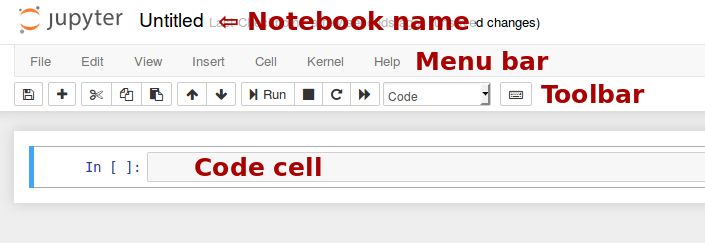


There are two fairly prominent terms that you should understand: cells and kernels. 

A kernel is a “computational engine” that executes the code contained in a notebook document.
A cell is a container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.


### Cells

Cells form the body of a notebook. The notebook consists of a sequence of cells. For example, this notebook consists of many  cells. 

There are two main cell types that we will use in this module:

#### Code Cell

A code cell contains code to be executed in the kernel. When the code is run, the notebook displays the output below the code cell that generated it.

#### Markdown Cell

A Markdown cell contains text formatted using Markdown and displays its output in-place when the Markdown cell is run.
Every cell starts off being a code cell, but its type can be changed by using a drop-down on the toolbar (which will be “Code”, initially).
The markdown cell will not give you any output if you run it as it is not a code cell.

#### Run a cell
To run a code cell, click on 'run' button on the toolbar or click cell on the menu bar and select run cells.


You can name a Jupyter Notebook by clicking on 'untitled' on the top of the notebook as shown in the screenshot above. Click on 'save' on the toolbar to save your work. You can download your notebook by clicking on 'file' in the menubar and download it as a notebook with .ipynb extension.

## Let's get started

This week you be continuing about the concept of machine learning and its types. You covered Artificial Neural Network as a complex method of implementing supervised learning. You explored how to create input layer, output layer and a hidden layer for this Artificial Neural Network. Let's apply this ANN using Python. 

In this exercise, you'll build and evaluate a linear regression based machine learning model and the following are the steps:
1. Import the libraries.
2. Define the class Config that has properties of neural_network_input_dimension(2), neural_network_output_dimension(2), learning_rate(0.01) and regularization_strength(0.01).
3. Generate data from the moons dataset.
4. Optionally the data from the moons dataset can be displayed into a scatter plot.
5. Define an activation function.
6. Define an forward propagation function.
7. The backwards propagation function is provided.
8. Define a calculate loss function, optionally regulatisation can be added.
9. Build the ANN model using the following steps; first extract the length of features and seed to one. The ANN has two inputs, you need two bias values and two weight values. Remember the bias and weights are the only values that can change over time. Once configured, you can start to train the model, first use forward propgation and then backwards propgation. Then refine the bias and weights using Gradient descent. Once train, the function returns the model.
10. Finally display the results by using the predict function.

Note that a function is written in Python to perform each step listed above and returns a value(s) that can be used by another function as an input(s). The assessments are also designed in similar fashion where you'll complete the coding of the functions and ensure that the results are correct.

### Import the libraries

In [24]:
import functions
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
import math
%matplotlib inline

In [17]:
def load_csv(filename):
    dataset = []
    with open(filename, 'r') as f:
        csv_reader = reader(f)
        for row in csv_reader:
            dataset.append(row)
    return dataset

In [18]:
def extract_only_x_data(dataset):
    if len(dataset) == 0:
        return

    data = list()

    for i in range(0, len(dataset)):
        data.append(list())

        for j in range(len(dataset[i]) - 1):
            data[-1].append(float(dataset[i][j]))

    return data

In [19]:
def extract_only_y_data(dataset):
    if len(dataset) == 0:
        return

    data = list()

    for i in range(len(dataset)):
        data.append(int(dataset[i][-1]))

    return data

### Defining the Config that contains the inputs for the network, the outputs for the network as well as the parameters for gradient descent 

In [20]:
class Config:
    neural_network_input_dimension = 2    # input layer dimensionality
    neural_network_output_dimension = 2   # output layer dimensionality
    learning_rate = 0.01                  # learning rate for gradient descent
    regularization_strength = 0.01        # regularization strength

### Generate two sets of some random data

In [21]:
def generate_data():
    filename = 'moons_1.csv'

    dataset = load_csv(filename)                            # load the data from a csv file

    x_data = extract_only_x_data(dataset)                   # extract the input data (2 inputs)
    y_data = extract_only_y_data(dataset)                   # extract the output data (1 output)
    
    X = np.array(x_data)                                    # convert the data into np array
    y = np.array(y_data)                                    # convert the data into np array

    return X, y                                             # returns both input (X) data and output (y) data

In [22]:
X, y = generate_data()

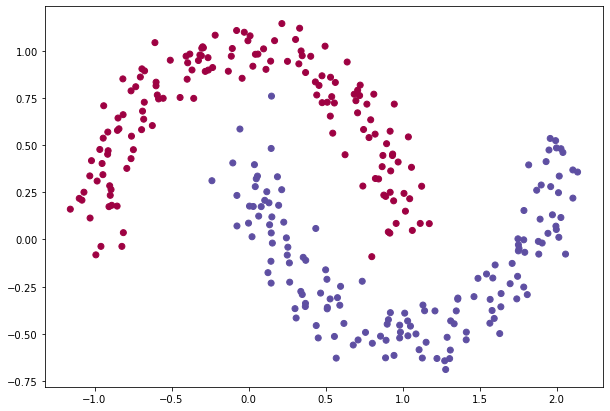

In [23]:
plt.figure(figsize=(10,7))                              # Defines the size of the plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)  # Draws a scatter plot

### Sigmoid function

In [25]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

### Forward Propagation

In [51]:
def forward_propagation(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return output

### Backward Propagation

In [59]:
def backward_propagation(X, y, W1, b1, W2, b2, exp_scores, number_of_examples):
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # delta: example x unit
    detla = probs
    detla[range(number_of_examples), y] -= 1 # de/do
    
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
#     z2 = np.dot(a1,W2) + b2
#     a2 = sigmoid(z2)
    
    dW2 = np.dot(a1.T, detla) # dE/dW2 = de/do * do/dW2
    db2 = np.sum(detla, axis=0, keepdims=True) # de/db2
    # db2: 1 x unit
    
    detla = np.dot(detla, W2.T) * a1 * (1 - a1)
    
    dW1 = np.dot(X.T, detla) # de/dw1
    db1 = np.sum(detla, axis=0, keepdims=True) # de/db1
    
    dW2 = dW2 + Config.regularization_strength * W2
    dW1 = dW1 + Config.regularization_strength * W1
    
    return dW1, dW2, db1, db2

### Define the loss function, used to evaluate how well the model is doing

In [41]:
def calculate_loss(model, X, y):
    number_of_examples = len(X)
    
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    
    exp_scores = forward_propagation(X, W1, b1, W2, b2)
    
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Calculating the loss
    
    correct_logprobs = -np.log(probs[range(number_of_examples), y])
    data_loss = np.sum(correct_logprobs)
    
    # Add regulatization term to loss (optional)
    
    data_loss = data_loss + Config.regularization_strength / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    return 1. / number_of_examples * data_loss

### Make a prediction

In [42]:
def predict(model, X):
    number_of_examples = len(X)
    
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    
    exp_scores = forward_propagation(X, W1, b1, W2, b2)
    
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    return np.argmax(probs, axis=1)

### Build the neural network using batch gradient descent using the backpropagation derivates

In [43]:
def build_model(X, y, number_of_nodes_within_hidden_layer, passes=20000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these
    
    number_of_examples = len(X)
    np.random.seed(0)
    
    # Two weights are needed as the network has two inputs
    # Likewise, two biases are needed as the network has two inputs
    
    W1 = np.random.randn(
        Config.neural_network_input_dimension, number_of_nodes_within_hidden_layer) / np.sqrt(Config.neural_network_input_dimension)
        
    b1 = np.zeros((1, number_of_nodes_within_hidden_layer))
    
    W2 = np.random.randn(
        number_of_nodes_within_hidden_layer, Config.neural_network_output_dimension) / np.sqrt(number_of_nodes_within_hidden_layer)
        
    b2 = np.zeros((1, Config.neural_network_output_dimension))
    
    model = {}
    
    for i in range(0, passes):
        # Forward Propgation

        exp_scores = forward_propagation(X, W1, b1, W2, b2)
        
        # Back Propgation
        
        dW1, dW2, db1, db2 = backward_propagation(X, y, W1, b1, W2, b2, exp_scores, number_of_examples);
        
        # Gradient descent parameter update
        
        W1 = W1 -Config.learning_rate * dW1
        b1 = b1 -Config.learning_rate * db1
        
        W2 = W2 -Config.learning_rate * dW2
        b2 = b2 -Config.learning_rate * db2
        
        # Assign new parameters to the model
        
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, calculate_loss(model, X, y)))
            
    return model

In [60]:
model = build_model(X, y, 3, print_loss=True, passes=20000)

[[ -2.51141802   2.51141802]
 [-14.29941925  14.29941925]
 [ 18.52573439 -18.52573439]]
[[ 0.5485338  -0.08738612]
 [-0.05959343  0.23705916]
 [ 0.08316359  0.8396252 ]]
Loss after iteration 0: 0.659376
[[ -2.28232057   2.28232057]
 [-10.97479455  10.97479455]
 [ 21.53569808 -21.53569808]]
[[ 0.57359313 -0.11249157]
 [ 0.08340672  0.09404126]
 [-0.10210207  1.02479858]]
[[ -4.74619073   4.74619073]
 [-11.17145788  11.17145788]
 [ 22.70876311 -22.70876311]]
[[ 0.59635898 -0.13530352]
 [ 0.19314632 -0.01571609]
 [-0.31744884  1.24005308]]
[[ -6.18642595   6.18642595]
 [-11.21668357  11.21668357]
 [ 24.26998549 -24.26998549]]
[[ 0.64376125 -0.1827519 ]
 [ 0.30484159 -0.1274291 ]
 [-0.54450472  1.46701671]]
[[ -7.64342531   7.64342531]
 [-11.790077    11.790077  ]
 [ 24.97882782 -24.97882782]]
[[ 0.70556113 -0.24459788]
 [ 0.41697794 -0.23958319]
 [-0.78715013  1.70956986]]
[[ -8.78133203   8.78133203]
 [-12.38007995  12.38007995]
 [ 24.86910572 -24.86910572]]
[[ 0.78192483 -0.32100768]
 [

KeyboardInterrupt: 

In [16]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.title("Artificial Neural Network")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [17]:
def visualize(X, y, model):
    plot_decision_boundary(lambda x:predict(model, x), X, y)

In [18]:
try:
    visualize(X, y, model)
except:
    print("Can not visualize the graph, the data or the model is inconsistent")